# DSGRN Python Interface Tutorial
This notebook shows the basics of manipulating DSGRN with the python interface.

In [1]:
import DSGRN

## Network
The starting point of the DSGRN analysis is a network specification.
We write each node name, a colon, and then a formula specifying how it reacts to its inputs.

In [2]:
network = DSGRN.Network("""
X1 : (X1+X2)(~X3)
X2 : (X1)
X3 : (X1)(~X2)""")

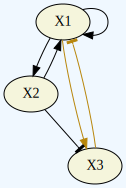

In [3]:
DSGRN.DrawGraph(network)

## ParameterGraph
Given a network, there is an associated "Parameter Graph", which is a combinatorial representation of parameter space.

In [4]:
parametergraph = DSGRN.ParameterGraph(network)

In [5]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 326592 nodes in the parameter graph.


## Parameter
The `ParameterGraph` class may be regarded as a factory which produces parameter nodes. In the DSGRN code, parameter nodes are referred to simply as "parameters" and are represented as "Parameter" objects.

In [6]:
par_index = 34892  # An arbitrarily selected integer in [0,326592)

In [7]:
parameter = parametergraph.parameter(par_index)

In [8]:
print(parameter)

[["X1",[3,3,"6D9000"],[0,2,1]],["X2",[1,2,"D"],[0,1]],["X3",[2,1,"8"],[0]]]


To get the partial orders defining the parameter we can use one of the commands below.

In [9]:
print(parameter.partialorders())

X1 : (p0, p1, p2, p3, t0, p4, t2, p5, p6, p7, t1)
X2 : (t0, p0, t1, p1)
X3 : (p0, p1, p2, t0, p3)


The options below returns a more complete description of the thresholds

In [10]:
print(parameter.partialorders('T'))

X1 : (p0, p1, p2, p3, T[X1->X1], p4, T[X1->X3], p5, p6, p7, T[X1->X2])
X2 : (T[X2->X1], p0, T[X2->X3], p1)
X3 : (p0, p1, p2, T[X3->X1], p3)


In [11]:
print(DSGRN.parameter_partial_orders(parametergraph, par_index))

X1 : (p0, p1, p2, p3, T[X1->X1], p4, T[X1->X3], p5, p6, p7, T[X1->X2])
X2 : (T[X2->X1], p0, T[X2->X3], p1)
X3 : (p0, p1, p2, T[X3->X1], p3)


We can get the expression for the threshold tj and the input polynomial pi for a given node with the commands below

In [12]:
node = 0
j = 1

print(parameter.output_threshold(j, node))

t1 = T[X1->X2]


In [13]:
node = 0
i = 0

print(parameter.input_polynomial(i, node))

p0 = L[X3->X1] (L[X1->X1] + L[X2->X1])


Or get all the thresholds and all the polynomials for given node

In [14]:
node = 0

print(DSGRN.parameter_output_thresholds(parameter, node))

t0 = T[X1->X1]
t1 = T[X1->X2]
t2 = T[X1->X3]


In [15]:
node = 0

print(DSGRN.parameter_input_polynomials(parameter, node))

p0 = L[X3->X1] (L[X1->X1] + L[X2->X1])
p1 = U[X3->X1] (L[X1->X1] + L[X2->X1])
p2 = L[X3->X1] (U[X1->X1] + L[X2->X1])
p3 = U[X3->X1] (U[X1->X1] + L[X2->X1])
p4 = L[X3->X1] (L[X1->X1] + U[X2->X1])
p5 = U[X3->X1] (L[X1->X1] + U[X2->X1])
p6 = L[X3->X1] (U[X1->X1] + U[X2->X1])
p7 = U[X3->X1] (U[X1->X1] + U[X2->X1])


The partial orders represent the inequalities defining the parameter. We can also get the inequalities on a more explicit format.

In [16]:
parameter.inequalities()

'{ "inequalities" : "L[X3->X1] (L[X1->X1] + L[X2->X1]) < T[X1->X1] && U[X3->X1] (L[X1->X1] + L[X2->X1]) < T[X1->X1] && L[X3->X1] (U[X1->X1] + L[X2->X1]) < T[X1->X1] && U[X3->X1] (U[X1->X1] + L[X2->X1]) < T[X1->X1] && T[X1->X1] < L[X3->X1] (L[X1->X1] + U[X2->X1]) < T[X1->X3] && T[X1->X3] < U[X3->X1] (L[X1->X1] + U[X2->X1]) < T[X1->X2] && T[X1->X3] < L[X3->X1] (U[X1->X1] + U[X2->X1]) < T[X1->X2] && T[X1->X3] < U[X3->X1] (U[X1->X1] + U[X2->X1]) < T[X1->X2] && 0 < T[X1->X1] < T[X1->X3] < T[X1->X2] && 0 < L[X3->X1] < U[X3->X1] && 0 < L[X1->X1] < U[X1->X1] && 0 < L[X2->X1] < U[X2->X1] && T[X2->X1] < L[X1->X2] < T[X2->X3] && T[X2->X3] < U[X1->X2] && 0 < T[X2->X1] < T[X2->X3] && 0 < L[X1->X2] < U[X1->X2] && L[X1->X3] L[X2->X3] < T[X3->X1] && U[X1->X3] L[X2->X3] < T[X3->X1] && L[X1->X3] U[X2->X3] < T[X3->X1] && T[X3->X1] < U[X1->X3] U[X2->X3] && 0 < T[X3->X1] && 0 < L[X1->X3] < U[X1->X3] && 0 < L[X2->X3] < U[X2->X3]", "variables" : "{L[X3->X1], L[X1->X1], L[X2->X1], U[X3->X1], U[X1->X1], U[X2->

# Parameter index from partial orders

In [17]:
par_index = 34892

In [18]:
parameter = parametergraph.parameter(par_index)

In [19]:
print(parameter.partialorders())

X1 : (p0, p1, p2, p3, t0, p4, t2, p5, p6, p7, t1)
X2 : (t0, p0, t1, p1)
X3 : (p0, p1, p2, t0, p3)


In [20]:
# Define partial orders as lists of string
partial_orders = [['p0', 'p1', 'p2', 'p3', 't0', 'p4', 't2', 'p5', 'p6', 'p7', 't1'],
                  ['t0', 'p0', 't1', 'p1'], ['p0', 'p1', 'p2', 't0', 'p3']]

# Get index from partial orders
DSGRN.index_from_partial_orders(parametergraph, partial_orders)

34892

In [21]:
# We can also use the strings output by partialorders()
partial_orders = ['(p0, p1, p2, p3, t0, p4, t2, p5, p6, p7, t1)',
                  '(t0, p0, t1, p1)', '(p0, p1, p2, t0, p3)']

# Get index from partial orders
DSGRN.index_from_partial_orders(parametergraph, partial_orders)

34892

In [22]:
# Get the string directly from the partialorders() output
part_orders = parameter.partialorders()

partial_orders = [p_order.split(':')[1].strip() for p_order in part_orders.split('\n')]

# Get index from partial orders
DSGRN.index_from_partial_orders(parametergraph, partial_orders)

34892

In [23]:
# We can also define the partial orders as lists of ints
# where pj is represented by j and tk is represented by
# k - m, where m is the number of out-edges from the node
partial_orders = [[0, 1, 2, 3, -3, 4, -1, 5, 6, 7, -2],
                  [-2, 0, -1, 1], [0, 1, 2, -1, 3]]

# Get index from partial orders
DSGRN.index_from_partial_orders(parametergraph, partial_orders)

34892

# Let's test on several parameters

In [24]:
all_correct = True

for par_index in range(500):
    # Define the parameter
    parameter = parametergraph.parameter(par_index)
    # Get the partial orders as a string
    p_ord = parameter.partialorders()
    partial_orders = []
    for d in range(network.size()):
        # Split string and extract partial order for each node d
        p_order = p_ord.split('\n')[d].split(':')[1].strip()[1:-1].replace(' ', '').split(',')
        partial_orders.append(p_order)
    # Get parameter index from partial orders
    index_from_order = DSGRN.index_from_partial_orders(parametergraph, partial_orders)
    # Check if we got the correct parameter index
    if not (index_from_order == par_index):
        all_correct = False
        print('Wrong parameter index!')
if all_correct:
    print('All parameter indices found correctly!')

All parameter indices found correctly!


In [25]:
all_correct = True

for par_index in range(500):
    # Define the parameter
    parameter = parametergraph.parameter(par_index)
    # Get the partial orders as a string
    p_ord = parameter.partialorders()
    partial_orders = []
    for d in range(network.size()):
        # Split string and extract partial order for each node d
        p_order = p_ord.split('\n')[d].split(':')[1].strip()[1:-1].replace(' ', '').split(',')
        m = len(network.outputs(d)) # Number of outputs
        part_order = [(int(p[1]) if p[0] == 'p' else int(p[1]) - m) for p in p_order]
        partial_orders.append(part_order)
    # Get parameter index from partial orders
    index_from_order = DSGRN.index_from_partial_orders(parametergraph, partial_orders)
    # Check if we got the correct parameter index
    if not (index_from_order == par_index):
        all_correct = False
        print('Wrong parameter index!')
if all_correct:
    print('All parameter indices found correctly!')

All parameter indices found correctly!


## DomainGraph
Let's compute the dynamics corresponding to this parameter node. In particular, we can instruct DSGRN to create a "domaingraph" object.

In [26]:
domaingraph = DSGRN.DomainGraph(parameter)

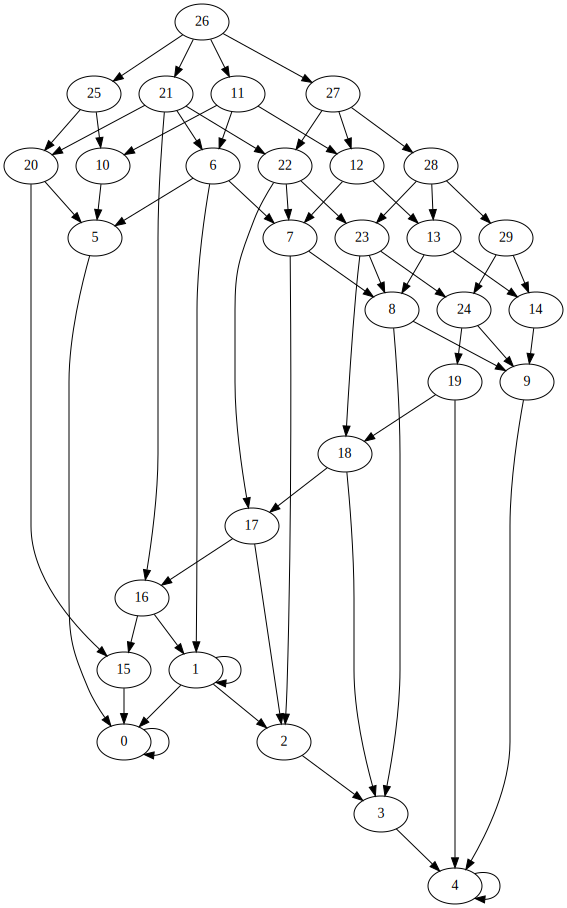

In [27]:
DSGRN.DrawGraph(domaingraph)

In [28]:
print(domaingraph.coordinates(5)) # ... I wonder what region in phase space domain 5 corresponds to.

[0, 1, 0]


## MorseDecomposition
Let's compute the partially ordered set of recurrent components (strongly connected components with an edge) of the domain graph.

In [29]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

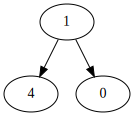

In [30]:
DSGRN.DrawGraph(morsedecomposition)

## MorseGraph
The final step in our analysis is the production of an annotated Morse graph.

In [31]:
morsegraph = DSGRN.MorseGraph(domaingraph, morsedecomposition)

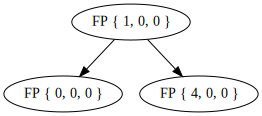

In [32]:
DSGRN.DrawGraph(morsegraph)

# Drawing Tables

In [33]:
from DSGRN import *
pg = ParameterGraph(Network("X : ~Y\nY : ~X\n"))

In [34]:
Table(["Parameter Index", "Morse Graph"], 
      [ [ i, DrawGraph(MorseGraph(DomainGraph(pg.parameter(i))))] for i in range(0,pg.size())])

Parameter Index,Morse Graph
0,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 0 }"
1,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 0 }"
2,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 0 }"
3,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 }"
4,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 } <!-- 1 --> 1 FP { 1, 0 }"
5,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 0 }"
6,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 }"
7,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 0, 1 }"
8,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- 0 --> 0 FP { 1, 1 }"


## ParameterSampler

We can sample real-valued parameter values from combinatorial parameter regions using the `ParameterSampler` class. This class provides a method `sample` which takes an integer parameter index and returns a string describing a randomly sampled instance within the associated parameter region.

In [35]:
sampler = DSGRN.ParameterSampler(network)

In [36]:
par_index = 2
parameter = parametergraph.parameter(par_index)
sampler.sample(parameter)

'{"Parameter":{"L[X1->X1]" : 1.7934824872480166, "L[X1->X2]" : 0.0032665526813286899, "L[X1->X3]" : 0.22667467906849156, "L[X2->X1]" : 0.032441002856379589, "L[X2->X3]" : 0.079477626911010638, "L[X3->X1]" : 0.092057672553950143, "T[X1->X1]" : 0.53432772013251939, "T[X1->X2]" : 0.92178459177198802, "T[X1->X3]" : 1.3039796643685366, "T[X2->X1]" : 0.40564288436952711, "T[X2->X3]" : 0.55142850147075551, "T[X3->X1]" : 2.0929602308322033, "U[X1->X1]" : 3.9741891286828195, "U[X1->X2]" : 0.21817687257016283, "U[X1->X3]" : 1.0807535204768377, "U[X2->X1]" : 0.66430892589107837, "U[X2->X3]" : 0.52378332364909586, "U[X3->X1]" : 0.16076533990896985}}'